## Dataset: Stellar Classification Dataset - SDSS17
### Contexto
En astronomía, la clasificación estelar es la clasificación de las estrellas en función de sus características espectrales. El esquema de clasificación de galaxias, quásares y estrellas es uno de los más fundamentales en astronomía. La catalogación temprana de las estrellas y su distribución en el cielo ha llevado a comprender que forman nuestra propia galaxia y, tras la distinción de que Andrómeda era una galaxia separada de la nuestra, se comenzaron a estudiar numerosas galaxias a medida que se construían telescopios más potentes. Este datasat tiene como objetivo clasificar estrellas, galaxias y quásares en función de sus características espectrales.


Contenido
Los datos constan de 100.000 observaciones del espacio realizadas por el SDSS (Sloan Digital Sky Survey). Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como estrella, galaxia o quásar.

1. obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por CAS
2. alpha = ángulo de Ascensión Recta (en la época J2000)
3. delta = ángulo de declinación (en la época J2000)
4. u = Filtro ultravioleta en el sistema fotométrico
5. g = Filtro verde en el sistema fotométrico
6. r = Filtro rojo en el sistema fotométrico
7. i = Filtro de infrarrojo cercano en el sistema fotométrico
8. z = Filtro de infrarrojos en el sistema fotométrico
9. run_ID = Número de ejecución utilizado para identificar el análisis específico
10. rereun_ID = Número de repetición para especificar cómo se procesó la imagen
11. cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
12. field_ID = Número de campo para identificar cada campo
13. spec_obj_ID = ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
14. class = clase de objeto (galaxia, estrella u objeto cuásar)
15. redshift = valor de corrimiento al rojo basado en el aumento de la longitud de onda
16. plate = ID de placa, identifica cada placa en SDSS
17. MJD = Fecha juliana modificada, utilizada para indicar cuándo se tomó un determinado dato del SDSS
18. fiber_ID = ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación



In [1]:
import pandas as pd

# Cargamos el dataset
df = pd.read_csv('data/star_classification.csv')

In [2]:
df.shape

(100000, 18)

In [3]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [4]:
len(df.columns)


18

In [5]:
NUMERICAL_FEATURES = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

In [6]:
LABEL = 'class'

In [7]:
# Vemos los primeros registros
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [8]:
# veamos si hay valores nulos
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [9]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [10]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

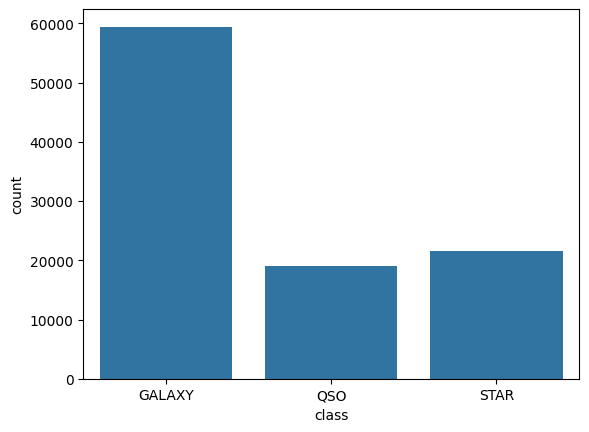

In [11]:
# Grafiquemos la distribución de las clases
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.show()


In [12]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [13]:
# Histograma con KDE usando Seaborn
def plot_histogram_seaborn(data):
    sns.histplot(data, kde=True)
    plt.title("Histograma con KDE")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")
    plt.show()

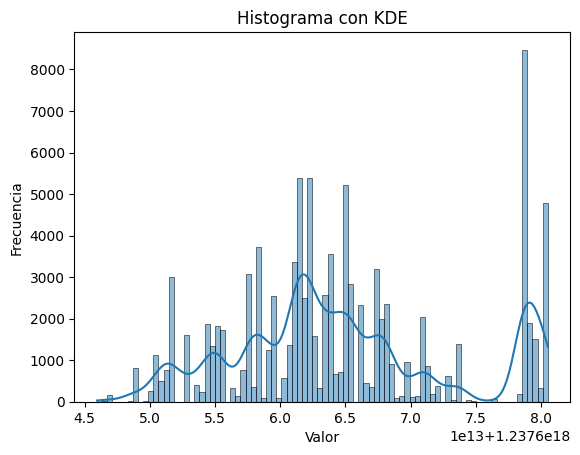

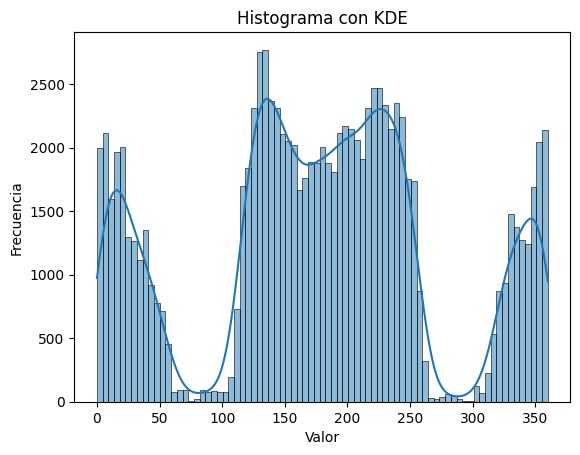

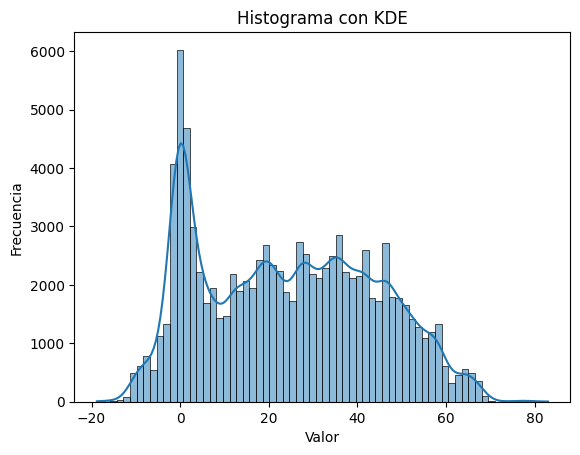

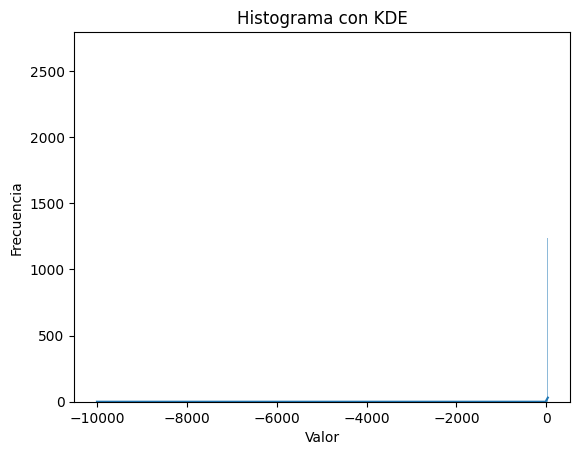

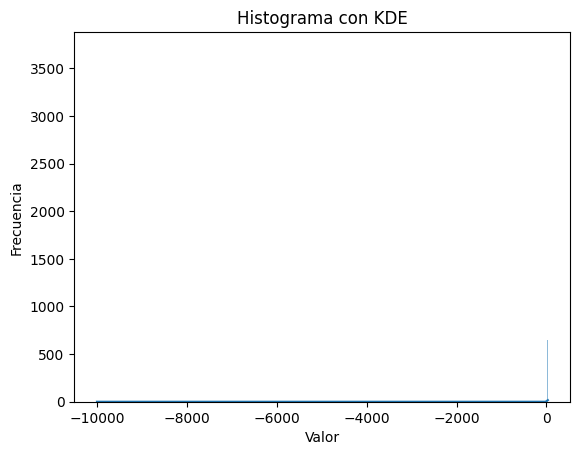

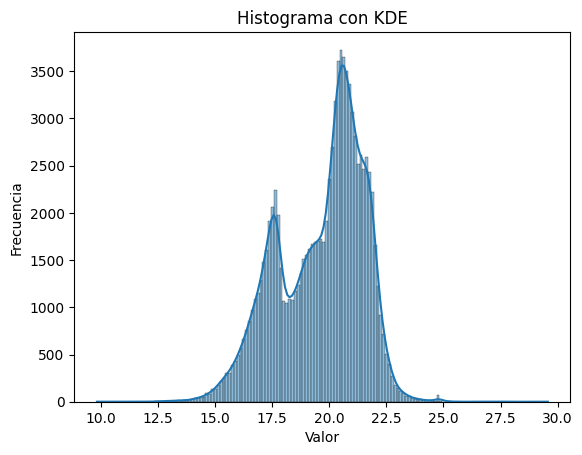

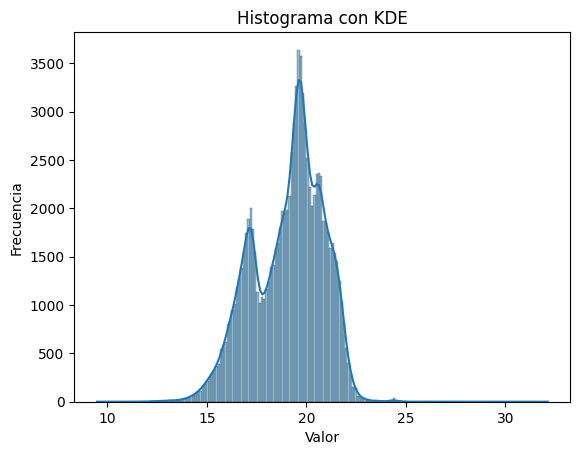

KeyboardInterrupt: 

In [14]:
# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

for i, column in enumerate(NUMERICAL_FEATURES):
    #sns.distplot(df[column], ax=axes[i//3, i%3])
    #sns.histplot(df[column], ax=axes[i//3, i%3], kde=True, stat='density')
#    sns.histplot(df[column])
    plot_histogram_seaborn(df[column])

plt.tight_layout()
plt.show()

In [ ]:
# convierto la columna class a numerica
df['class'] = df['class'].map({'STAR': 0, 'GALAXY': 1, 'QSO': 2})


In [ ]:
df.dtypes

In [ ]:
# grafiocamos la correlación entre las variables y la variable objetivo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [ ]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
df.corr()['class'].sort_values(ascending=False)

In [ ]:
# veo si hay valores nulos
df.isnull().sum()

In [ ]:
# veo si hay valores NaN
df.isna().sum()

In [ ]:
# valores unicos de la columna rerun_ID
df['rerun_ID'].unique()

In [ ]:
# valores unicos de la columna cam_col
df['cam_col'].unique()